_Valentin Hulot - M1_IL - 02/2020_

# TP2 Hearthstone Dataset

We want to :  
- **Part1 : Search deck sets**  
    - Read text input  
    - Prepare 2 arrays of unique cards for filtering  
        - Exclude Begin & TheCoin for deckset WITH hero powers  
        - Also exclude hero powers for deckset WITHOUT hero powers  
    - (Bonus) Little Visualization (most played cards)  
    - Prepare 2 dataframes accordingly  
    - Print in a formatted file for SPMF  

- **Part 2 : Sequential rules**  
    - Reorder dataframe so we have player turns alternating    
    - Output differently our 2 datasets  

## Part1 : Search deck sets

### Read Text Input

In [1]:
# Import panda & numpy

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load file into dataframe

file = "./data/all_absolute+.txt"
data = pd.read_csv(file, sep=" ", header=None)
data.head()

,0,1,2
0,0,Begin,0
1,0,MTwilightWhelp,1
2,0,OTheCoin,1
3,0,ONerubianEgg,1
4,0,MLesserHeal,2


In [3]:
# Check for missing values 

data.isna().sum()

0    0
1    0
2    0
dtype: int64

In [4]:
# Rename columns

data.rename({0: 'gameId', 1: 'cardName',2:'turnId'},axis='columns',inplace=True, errors='raise')
data.head()

,gameId,cardName,turnId
0,0,Begin,0
1,0,MTwilightWhelp,1
2,0,OTheCoin,1
3,0,ONerubianEgg,1
4,0,MLesserHeal,2


In [5]:
# Extract playerId from cardName (Begin doesn't have playerId)

data.loc[data.cardName != "Begin", "playerId"] = data["cardName"].str.slice(0,1)
data.loc[data.cardName != "Begin", "cardName"] = data["cardName"].str.slice(1)
data.head()

,gameId,cardName,turnId,playerId
0,0,Begin,0,NaN
1,0,TwilightWhelp,1,M
2,0,TheCoin,1,O
3,0,NerubianEgg,1,O
4,0,LesserHeal,2,M


In [6]:
# Reorder columns for visibility

data = data.reindex(columns=['gameId',"playerId","cardName","turnId"])
data.head()

,gameId,playerId,cardName,turnId
0,0,NaN,Begin,0
1,0,M,TwilightWhelp,1
2,0,O,TheCoin,1
3,0,O,NerubianEgg,1
4,0,M,LesserHeal,2


In [7]:
count = data.count()
count

gameId      7439
playerId    7232
cardName    7439
turnId      7439
dtype: int64

### Prepare 2 arrays of unique cards for filtering

#### Exclude Begin & TheCoin for deck WITH hero powers

In [8]:
# Get list of unique cards
uniqueCards = data.cardName.unique()
uniqueCards[:10]

array(['Begin', 'TwilightWhelp', 'TheCoin', 'NerubianEgg', 'LesserHeal',
       'AbusiveSergeant', 'MortalCoil', 'DarkCultist',
       'PowerOverwhelming', 'LifeTap'], dtype=object)

In [9]:
#Exlude Begin & TheCoin
uniqueCards = np.delete(uniqueCards, np.argwhere((uniqueCards == "Begin") | (uniqueCards== "TheCoin")))
uniqueCards[:10]

array(['TwilightWhelp', 'NerubianEgg', 'LesserHeal', 'AbusiveSergeant',
       'MortalCoil', 'DarkCultist', 'PowerOverwhelming', 'LifeTap',
       'ImpGangBoss', 'BlackwingCorruptor'], dtype=object)

In [10]:
# Sort alphabetically
uniqueCards.sort()
uniqueCards[:10]

array(['AbusiveSergeant', 'AcidicSwampOoze', 'AcolyteofPain',
       'AldorPeacekeeper', 'Alexstrasza', 'AmaniBerserker',
       'AncestralKnowledge', 'AncestralSpirit', 'AncientSecrets',
       'AncientWatcher'], dtype=object)

In [11]:
# Number of cards in deck
uniqueCards.size

455

#### Also exlude hero powers for deckset WITHOUT hero powres

In [12]:
# Exclude champions power, get results in new set
# we want one with hero powers, and one without

powers = ["ArmorUp!","DaggerMastery","Fireblast","LesserHeal","LifeTap","Reinforce","Shapeshift","SteadyShot","TotemicCall"]
uniqueCardsWithoutPowers = np.setdiff1d(uniqueCards,powers)
uniqueCardsWithoutPowers[:10]

array(['AbusiveSergeant', 'AcidicSwampOoze', 'AcolyteofPain',
       'AldorPeacekeeper', 'Alexstrasza', 'AmaniBerserker',
       'AncestralKnowledge', 'AncestralSpirit', 'AncientSecrets',
       'AncientWatcher'], dtype=object)

In [13]:
uniqueCardsWithoutPowers.size

446

### (Bonus) Little Visualization (most played cards)

In [14]:
# Create a variable called 'freq' to hold the card names and their frequencies
freq = data['cardName'].value_counts()
# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()
freq.head()

,index,cardName
0,Fireblast,467
1,LesserHeal,407
2,Begin,207
3,TheCoin,187
4,Shapeshift,170


In [15]:
# Rename the columns in the dataframe. 
freq.columns = ['cardName','freq']
# Verify the result.
freq.head()

,cardName,freq
0,Fireblast,467
1,LesserHeal,407
2,Begin,207
3,TheCoin,187
4,Shapeshift,170


In [16]:
# Filter unwanted cards
freq= freq[freq.cardName.isin(uniqueCardsWithoutPowers)]
# Verify the result.
freq.head()

,cardName,freq
5,PilotedShredder,163
9,HauntedCreeper,99
11,AzureDrake,96
12,Dr.Boom,88
14,SludgeBelcher,83


In [17]:
# Get top 20 most played cards
freqToPlot = freq.head(20).sort_values('freq')

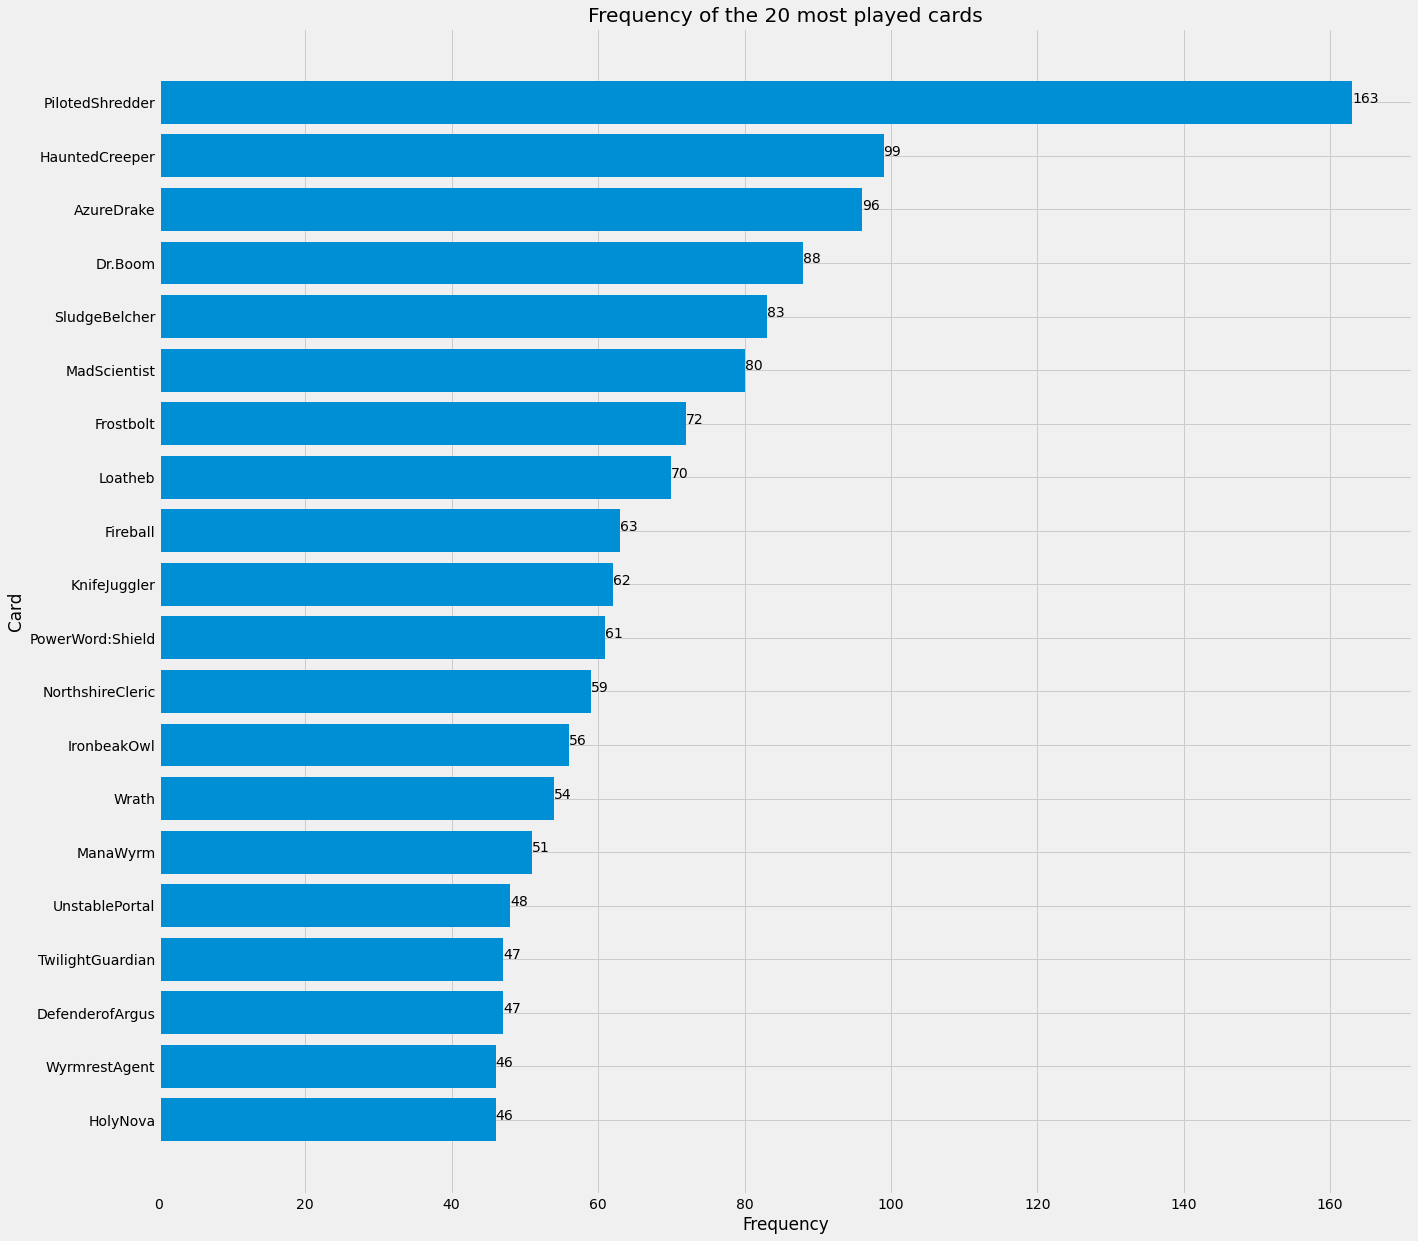

In [18]:
with  plt.style.context('fivethirtyeight'):
    # Set a size for the graph
    plt.figure(figsize=(20,20))

    # Add axis labels
    plt.title('Frequency of the 20 most played cards')
    plt.ylabel('Card')
    plt.xlabel('Frequency')

    # Plot the graph using a round symbol "o" of size 10
    #plt.plot(freq.cardName,freq.freq, "o", markersize = 10, color = 'g')
    plt.barh(freqToPlot.cardName,freqToPlot.freq)

    for index, value in enumerate(freqToPlot.freq):
        plt.text(value, index, str(value))

    plt.show()

### Prepare 2 dataframes accordingly

In [19]:
# Prepare dataframe with all cards and powers
# Copy dataframe
deckDf = data
deckDf

,gameId,playerId,cardName,turnId
0,0,NaN,Begin,0
1,0,M,TwilightWhelp,1
2,0,O,TheCoin,1
3,0,O,NerubianEgg,1
4,0,M,LesserHeal,2
...,...,...,...,...
7434,206,O,ShieldedMinibot,11
7435,206,M,Hellfire,12
7436,206,M,INFERNO!,12
7437,206,O,TruesilverChampion,12


In [20]:
# Filter df to remove unwanted cards
deckDf = deckDf[deckDf.cardName.isin(uniqueCards)]
deckDf

,gameId,playerId,cardName,turnId
1,0,M,TwilightWhelp,1
3,0,O,NerubianEgg,1
4,0,M,LesserHeal,2
5,0,M,LesserHeal,2
6,0,O,AbusiveSergeant,2
...,...,...,...,...
7434,206,O,ShieldedMinibot,11
7435,206,M,Hellfire,12
7436,206,M,INFERNO!,12
7437,206,O,TruesilverChampion,12


In [21]:
# test get index
i = np.where(uniqueCards == "Loatheb")[0][0]
i

257

In [22]:
# add cards id
# /!\ ITEM MUST START WITH 1 instead of 0 -> offset/!\
offset = 1

deckDf["cardId"]  = deckDf.apply(lambda row: np.where(uniqueCards == row["cardName"])[0][0]+offset, axis=1)
deckDf.head()

<ipython-input-22-aeeb9eb365fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deckDf["cardId"]  = deckDf.apply(lambda row: np.where(uniqueCards == row["cardName"])[0][0]+offset, axis=1)


,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,420
3,0,O,NerubianEgg,1,305
4,0,M,LesserHeal,2,250
5,0,M,LesserHeal,2,250
6,0,O,AbusiveSergeant,2,1


In [23]:
#get a copy of df for part 2, because we'll need the duplicates
sequentialDf = deckDf

# drop duplicated for cards played by a player in the same game
deckDf = deckDf.drop_duplicates(subset=['gameId', 'playerId', 'cardName'])
deckDf

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,420
3,0,O,NerubianEgg,1,305
4,0,M,LesserHeal,2,250
6,0,O,AbusiveSergeant,2,1
7,0,O,MortalCoil,2,288
...,...,...,...,...,...
7430,206,M,INFERNO!,11,214
7431,206,M,Stalagg,11,383
7432,206,O,AldorPeacekeeper,11,4
7435,206,M,Hellfire,12,203


In [24]:
# Sort to get deck 1 then 2, then 3... 
# /!\ We want the decks to contains the cards sorted by cardID ASCENDING /!\

deckDf = deckDf.sort_values(by=['gameId', 'playerId','cardId'])
deckDf.head()

,gameId,playerId,cardName,turnId,cardId
15,0,M,AzureDrake,6,37
13,0,M,BlackwingCorruptor,5,49
26,0,M,CabalShadowPriest,8,65
8,0,M,DarkCultist,3,92
4,0,M,LesserHeal,2,250


#### Write first file

In [25]:
''' Template
@CONVERTED_FROM_TEXT
@ITEM=1=apple
@ITEM=2=orange
@ITEM=3=tomato
@ITEM=4=milk
@ITEM=5=bread
1 3 4
2 3 5
1 2 3 5
2 5
1 2 3 5
'''

' Template\n@CONVERTED_FROM_TEXT\n@ITEM=1=apple\n@ITEM=2=orange\n@ITEM=3=tomato\n@ITEM=4=milk\n@ITEM=5=bread\n1 3 4\n2 3 5\n1 2 3 5\n2 5\n1 2 3 5\n'

In [26]:
# New file for output

f = open("outputWithPowers.txt", "w")

In [27]:
# Write cards

def printItemsHeaders(file, df):
    uniqueValues = df[['cardName', 'cardId']].drop_duplicates().sort_values(by=['cardId'])
    
    f.write("@CONVERTED_FROM_TEXT\n")
    for i,row in uniqueValues.iterrows():
        f.write("@ITEM={}={}\n".format(row['cardId'],row['cardName']))
        
printItemsHeaders(f,deckDf)

In [28]:
# Write decks

def createDeckOutput(file,df):
    # init with first row value
    oldPlayerId = df["playerId"][1]
    for index, row in df.iterrows():
       
        # if player change
        if(row["playerId"] != oldPlayerId):
            file.write("\n")
            oldPlayerId = row["playerId"]
        
        # print 
        file.write(format(row["cardId"])+" ")

createDeckOutput(f,deckDf)

In [29]:
# Close file buffer
f.close()

In [30]:
# Check if our file is as expected

def checkFileContent(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line[:-1])

checkFileContent("outputWithPowers.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=32=ArmorUp!
@ITEM=33=Armorsmith
@ITEM=34=AuchenaiSoulpriest
@ITEM=35=Avenge
@ITEM=36=AvengingWrath
@ITEM=37=AzureDrake
@ITEM=38=Backstab
@ITEM=39=Bananas
@ITEM=40=BaneofDoom
@ITEM=41=BaronGeddon
@ITEM=42=BaronRivendare
@ITEM=43=Bash
@ITE

#### Do the same to produce decks without powers

In [31]:
# Dataframe

deckDfWithoutPower= deckDf[deckDf.cardName.isin(uniqueCardsWithoutPowers)]
deckDfWithoutPower

,gameId,playerId,cardName,turnId,cardId
15,0,M,AzureDrake,6,37
13,0,M,BlackwingCorruptor,5,49
26,0,M,CabalShadowPriest,8,65
8,0,M,DarkCultist,3,92
21,0,M,PowerWord:Shield,7,317
...,...,...,...,...,...
7413,206,O,NobleSacrifice,7,307
7396,206,O,PilotedShredder,4,313
7399,206,O,Redemption,5,327
7394,206,O,ShieldedMinibot,3,359


In [32]:
# Write

f = open("outputWithoutPowers.txt", "w")
printItemsHeaders(f,deckDfWithoutPower)
createDeckOutput(f,deckDfWithoutPower)
f.close()

In [33]:
# Check

checkFileContent("outputWithoutPowers.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=33=Armorsmith
@ITEM=34=AuchenaiSoulpriest
@ITEM=35=Avenge
@ITEM=36=AvengingWrath
@ITEM=37=AzureDrake
@ITEM=38=Backstab
@ITEM=39=Bananas
@ITEM=40=BaneofDoom
@ITEM=41=BaronGeddon
@ITEM=42=BaronRivendare
@ITEM=43=Bash
@ITEM=44=BattleRage
@I

14 128 176 237 313 323 425 440 
12 113 233 349 392 
35 37 49 140 208 252 275 300 307 308 313 317 327 405 419 420 446 451 455 
15 76 82 85 108 227 232 240 302 307 313 332 359 405 413 
26 31 75 77 162 178 271 279 371 404 427 
2 95 158 203 218 286 368 383 
48 62 94 95 101 105 113 138 158 203 214 218 219 227 258 260 286 288 316 328 354 365 368 383 455 
16 48 56 62 94 95 113 138 158 203 218 219 227 258 260 281 328 331 354 364 368 383 395 418 455 
26 31 75 77 113 162 178 258 271 313 371 380 427 
21 113 133 138 162 271 313 335 368 374 427 455 
35 62 94 101 105 113 203 218 258 281 288 307 316 328 331 354 364 368 395 418 
35 52 76 108 113 227 232 258 294 301 302 305 307 327 346 413 
15 38 51 188 199 226 277 313 339 
18 21 37 171 178 241 283 313 427 
49 92 113 116 308 317 351 368 420 429 
11 125 138 224 233 258 341 349 368 393 
42 101 130 158 200 313 336 
30 106 200 305 316 
50 65 92 208 252 419 420 451 
1 14 19 186 200 236 240 258 343 425 
37 65 116 252 300 308 317 351 362 419 420 429 451 455 


## Part 2 : Sequential rules

### Reorder dataframe so we have player turns alternating

In [34]:
# Get back pre-treated df from part 1

sequentialDf.head()

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,420
3,0,O,NerubianEgg,1,305
4,0,M,LesserHeal,2,250
5,0,M,LesserHeal,2,250
6,0,O,AbusiveSergeant,2,1


In [35]:
# Sort by gameId then turnId
# we want one game by line and
# get one itemset for each player turn, cards ordered ascending

sequentialDf = sequentialDf.sort_values(by=['gameId', 'turnId','playerId','cardId'])
sequentialDf.head(10)

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,420
3,0,O,NerubianEgg,1,305
4,0,M,LesserHeal,2,250
5,0,M,LesserHeal,2,250
6,0,O,AbusiveSergeant,2,1
7,0,O,MortalCoil,2,288
8,0,M,DarkCultist,3,92
10,0,O,LifeTap,3,251
9,0,O,PowerOverwhelming,3,316
11,0,M,DarkCultist,4,92


In [36]:
# drop duplicated for cards played by a player in the same turn
sequentialDf = sequentialDf.drop_duplicates(subset=['gameId', 'playerId', 'cardName','turnId'])
sequentialDf.head(10)

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,420
3,0,O,NerubianEgg,1,305
4,0,M,LesserHeal,2,250
6,0,O,AbusiveSergeant,2,1
7,0,O,MortalCoil,2,288
8,0,M,DarkCultist,3,92
10,0,O,LifeTap,3,251
9,0,O,PowerOverwhelming,3,316
11,0,M,DarkCultist,4,92
12,0,O,ImpGangBoss,4,219


In [37]:
''' Template
@CONVERTED_FROM_TEXT
@ITEM=1=apple
@ITEM=2=orange
@ITEM=3=tomato
@ITEM=4=milk
@ITEM=5=bread
@ITEM=6=noodle
@ITEM=7=rice
@ITEM=-1=|
1 -1 1 2 3 -1 1 3 -1 4 -1 3 6 -1 -2
1 4 -1 3 -1 2 3 -1 1 5 -1 -2
5 6 -1 1 2 -1 4 6 -1 3 -1 2 -1 -2
5 -1 7 -1 1 6 -1 3 -1 2 -1 3 -1 -2
'''

' Template\n@CONVERTED_FROM_TEXT\n@ITEM=1=apple\n@ITEM=2=orange\n@ITEM=3=tomato\n@ITEM=4=milk\n@ITEM=5=bread\n@ITEM=6=noodle\n@ITEM=7=rice\n@ITEM=-1=|\n1 -1 1 2 3 -1 1 3 -1 4 -1 3 6 -1 -2\n1 4 -1 3 -1 2 3 -1 1 5 -1 -2\n5 6 -1 1 2 -1 4 6 -1 3 -1 2 -1 -2\n5 -1 7 -1 1 6 -1 3 -1 2 -1 3 -1 -2\n'

In [38]:
# New file for output
f = open("outputSequentialWithPowers.txt", "w")

In [39]:
# Print item list
printItemsHeaders(f,sequentialDf)
# add item @ITEM=-1=| to indicate end of item set
f.write("@ITEM=-1=|\n")

11

In [40]:
# Write decks
# /!\ Always end line with -1 then -2 /!\

def createSequentialOutput(file,df):
    #init with first row values
    oldGameId = df["gameId"][1]
    oldPlayerId = df["playerId"][1]
    oldTurnId = df["turnId"][1]

    for index, row in df.iterrows():
        
        # if game change, append -1-2\n
        if(row["gameId"] != oldGameId):
            oldGameId = row["gameId"]
            oldPlayerId = row["playerId"]
            oldTurnId = row["turnId"]
            file.write("-1 -2\n")
        
        # if player or turn change, append -1
        elif(row["playerId"] != oldPlayerId or row["turnId"] != oldTurnId):
            file.write("-1 ")
            oldPlayerId = row["playerId"]
            oldTurnId = row["turnId"]
        
        # print 
        file.write(format(row["cardId"])+" ")

createSequentialOutput(f,sequentialDf)

In [41]:
# Close file buffer
f.close()

In [42]:
checkFileContent("outputSequentialWithPowers.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=32=ArmorUp!
@ITEM=33=Armorsmith
@ITEM=34=AuchenaiSoulpriest
@ITEM=35=Avenge
@ITEM=36=AvengingWrath
@ITEM=37=AzureDrake
@ITEM=38=Backstab
@ITEM=39=Bananas
@ITEM=40=BaneofDoom
@ITEM=41=BaronGeddon
@ITEM=42=BaronRivendare
@ITEM=43=Bash
@ITE

### Do the same for the dataset without hero powers

In [43]:
sequentialDfWithoutPowers = sequentialDf[sequentialDf.cardName.isin(uniqueCardsWithoutPowers)]
f = open("outputSequentialWithoutPowers.txt", "w")
printItemsHeaders(f,sequentialDfWithoutPowers)
f.write("@ITEM=-1=|\n")
createSequentialOutput(f,sequentialDfWithoutPowers)
f.close()

In [44]:
checkFileContent("outputSequentialWithoutPowers.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=33=Armorsmith
@ITEM=34=AuchenaiSoulpriest
@ITEM=35=Avenge
@ITEM=36=AvengingWrath
@ITEM=37=AzureDrake
@ITEM=38=Backstab
@ITEM=39=Bananas
@ITEM=40=BaneofDoom
@ITEM=41=BaronGeddon
@ITEM=42=BaronRivendare
@ITEM=43=Bash
@ITEM=44=BattleRage
@I

# THE END